In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
# data set link: https://zenodo.org/records/10962212
df = pd.read_csv('properties.csv', encoding="utf-8")

In [22]:
df_col_values = ["reference", "location", "price", "title", "bedrooms", "bathrooms", "indoor_surface_area_sqm", "outdoor_surface_area_sqm", "features"]
df.columns = df_col_values
print(df["location"].head(20))

#display(df.head())

0               Puerto Banús, Costa del Sol
1                  Antequera, Costa del Sol
2                 La Mairena, Costa del Sol
3                Benalmadena, Costa del Sol
4                   Estepona, Costa del Sol
5     San Pedro de Alcántara, Costa del Sol
6                       Coín, Costa del Sol
7                   Estepona, Costa del Sol
8               Puerto Banús, Costa del Sol
9                    Casares, Costa del Sol
10                   Casares, Costa del Sol
11     Altos de los Monteros, Costa del Sol
12                La Duquesa, Costa del Sol
13               Carib Playa, Costa del Sol
14               Benalmadena, Costa del Sol
15               El Madroñal, Costa del Sol
16           Nueva Andalucía, Costa del Sol
17               El Madroñal, Costa del Sol
18                  Marbella, Costa del Sol
19             Sierra Blanca, Costa del Sol
Name: location, dtype: object


In [23]:
# prumpt, parsing the features column into seperate columns.
features_dummies = df["features"].fillna("").str.get_dummies(sep="|")
print(f"Created {features_dummies.shape[1]} feature indicator columns from 'features'.")

# 1/0 to Y/N, nes categorical features 
features_dummies = features_dummies.replace({1: 'Y', 0: 'N'})

df = pd.concat([df.reset_index(drop=True), features_dummies.reset_index(drop=True)], axis=1)
# Remove double brackets - drop() expects a list, not a list containing a list
df = df.drop(columns=["features", "reference"])
display(df.head())


Created 147 feature indicator columns from 'features'.


,location,price,title,bedrooms,bathrooms,indoor_surface_area_sqm,outdoor_surface_area_sqm,Access for people with reduced mobility,Air Conditioning Climate Control,Alarm System Security,...,U/F Heating Climate Control,Underground Parking,Urban Views,Urbanisation,Utility Room,Village,West Orientation,WiFi,With Planning Permission,Wood Flooring
0,"Puerto Banús, Costa del Sol","€1,250,000",Other,1.0,504.0,NaN,NaN,N,N,N,...,N,Y,N,N,N,N,Y,N,N,N
1,"Antequera, Costa del Sol","€749,000",12 Bedroom Finca,12.0,7.0,366.0,5353.0,N,Y,N,...,N,N,Y,N,N,N,N,N,N,N
2,"La Mairena, Costa del Sol","€500,000",Plot,3470.0,NaN,NaN,NaN,N,N,N,...,N,N,N,Y,N,N,N,N,Y,N
3,"Benalmadena, Costa del Sol","€1,695,000",4 Bedroom Detached Villa,4.0,4.0,634.0,1000.0,N,Y,N,...,N,N,N,N,N,N,N,N,N,N
4,"Estepona, Costa del Sol","€480,000",4 Bedroom Semi-detached,4.0,2.0,130.0,350.0,N,N,N,...,N,N,N,N,N,N,N,N,N,N


In [24]:
# Remove € symbol and commas, then convert to float
df["price"] = df["price"].str.replace('€', '').str.replace(',', '').astype(float)

In [25]:
continuesFeatures = df.select_dtypes(exclude=['object']).columns.tolist()
categoricalFeatures = df.select_dtypes(include=['object']).columns.tolist()
print(f"Num. of continues values: {len(continuesFeatures)}")
print(f"Num. of categorical values: {len(categoricalFeatures)}")

Num. of continues values: 5
Num. of categorical values: 149


In [26]:
print(df.info())
print("\n\nSummary of object columns:")
display(df.describe(include=['object']))
print("\n\nSummary of number columns:")
display(df.describe(include=['number']))
print("\n\nSummary of missing values:")
print(df.isna().sum().to_string())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12085 entries, 0 to 12084
Columns: 154 entries, location to Wood Flooring
dtypes: float64(5), object(149)
memory usage: 14.2+ MB
None


Summary of object columns:


,location,title,Access for people with reduced mobility,Air Conditioning Climate Control,Alarm System Security,Bar,Barbeque,Bargain,Basement,Beach Views,...,U/F Heating Climate Control,Underground Parking,Urban Views,Urbanisation,Utility Room,Village,West Orientation,WiFi,With Planning Permission,Wood Flooring
count,12085,12085,12085,12085,12085,12085,12085,12085,12085,12085,...,12085,12085,12085,12085,12085,12085,12085,12085,12085,12085
unique,226,160,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,"Estepona, Costa del Sol",2 Bedroom Apartment,N,Y,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N
freq,1062,2043,10851,7902,9891,11619,10162,10612,11069,11527,...,11108,9071,10057,6923,8376,11160,10213,9128,11856,11675




Summary of number columns:


,price,bedrooms,bathrooms,indoor_surface_area_sqm,outdoor_surface_area_sqm
count,1.208500e+04,1.208300e+04,1.095100e+04,10413.000000,3.821000e+03
mean,1.047026e+06,2.533727e+03,1.076583e+03,233.500144,1.113215e+04
std,1.881368e+06,9.853550e+04,4.636695e+04,265.075315,1.960650e+05
min,4.500000e+03,0.000000e+00,0.000000e+00,10.000000,1.000000e+00
25%,2.850000e+05,2.000000e+00,2.000000e+00,100.000000,4.010000e+02
50%,4.750000e+05,3.000000e+00,2.000000e+00,145.000000,1.009000e+03
75%,9.950000e+05,5.000000e+00,4.000000e+00,269.000000,2.342000e+03
max,5.000000e+07,9.700000e+06,4.630000e+06,5367.000000,9.350000e+06




Summary of missing values:
location                                      0
price                                         0
title                                         0
bedrooms                                      2
bathrooms                                  1134
indoor_surface_area_sqm                    1672
outdoor_surface_area_sqm                   8264
Access for people with reduced mobility       0
Air Conditioning Climate Control              0
Alarm System Security                         0
Bar                                           0
Barbeque                                      0
Bargain                                       0
Basement                                      0
Beach Views                                   0
Beachfront                                    0
Beachside                                     0
Car Hire Facility                             0
Central Heating Climate Control               0
Cheap                                         0
Children`s 

In [27]:
# TODO: Pakeisti i koki nors gersni NA fill, nes cia ir lauku, be namu, listings yra 
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median()) 
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].median()) 
df["indoor_surface_area_sqm"] = df["indoor_surface_area_sqm"].fillna(df["indoor_surface_area_sqm"].median())
df["outdoor_surface_area_sqm"] = df["outdoor_surface_area_sqm"].fillna(0)

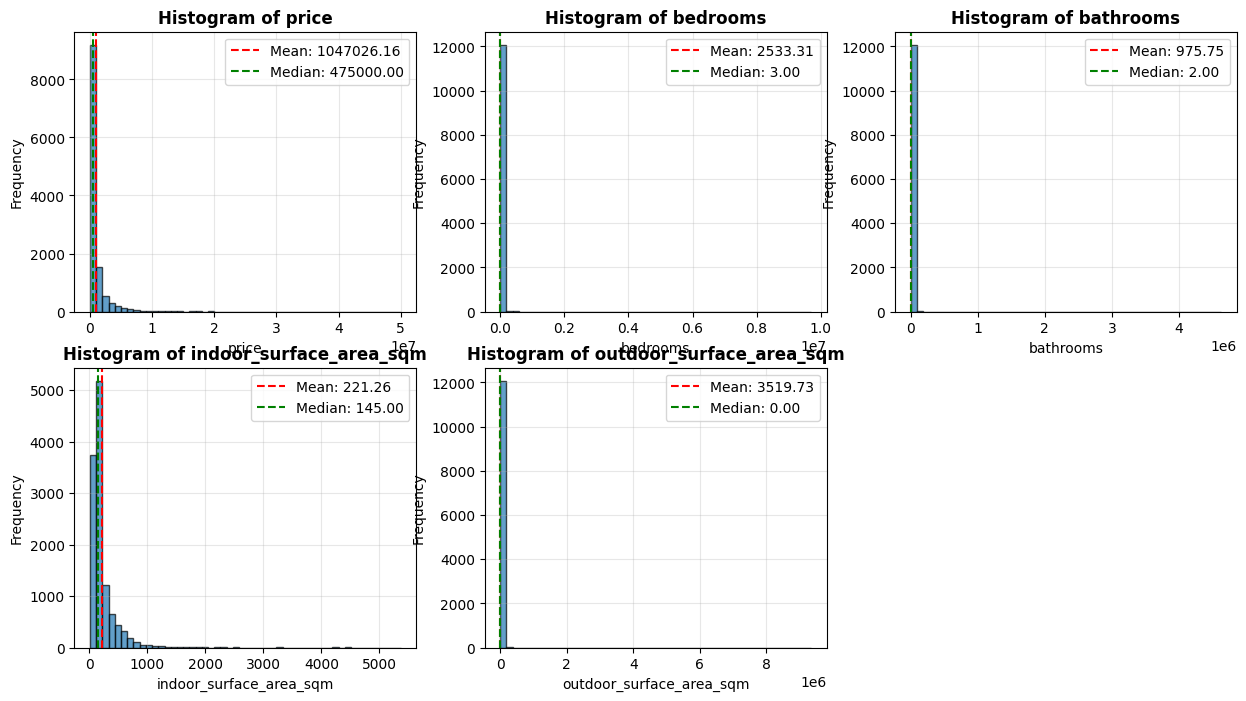

In [28]:
n_features = len(continuesFeatures)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_features > 1 else [axes]

for i, feature in enumerate(continuesFeatures):
    data = df[feature].dropna()
    axes[i].hist(data, bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    
    mean_val = data.mean()
    median_val = data.median()
    axes[i].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[i].legend()

for i in range(n_features, len(axes)):
    axes[i].set_visible(False)



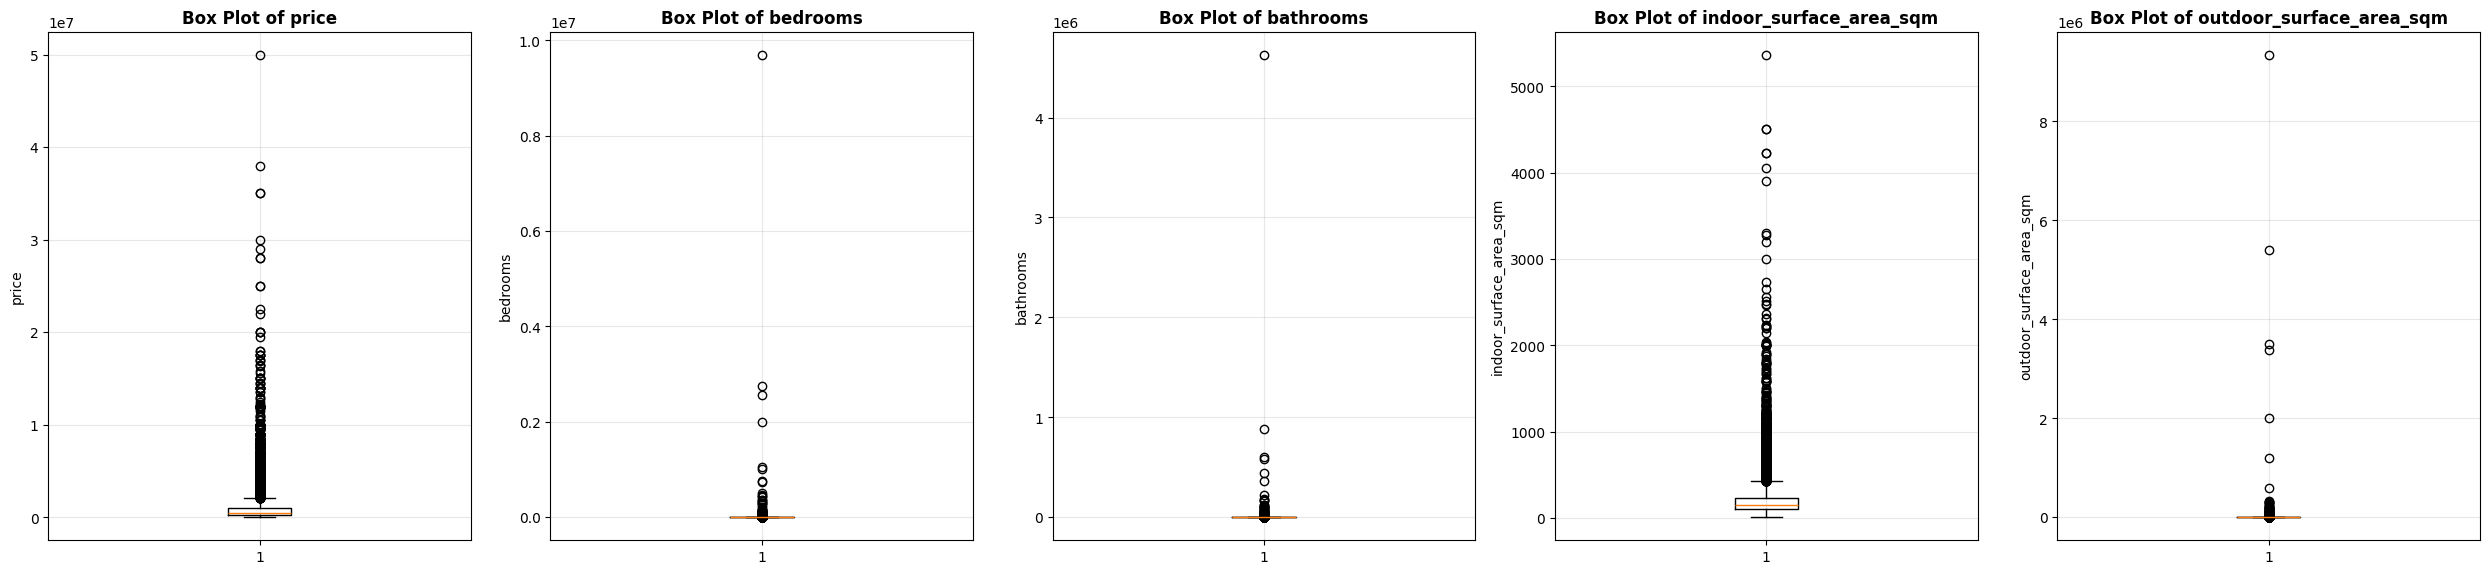

In [29]:

fig, axes = plt.subplots(1, n_features, figsize=(5*n_features, 6))
if n_features == 1:
    axes = [axes]

for i, feature in enumerate(continuesFeatures):
    data = df[feature].dropna()
    axes[i].boxplot(data, vert=True)
    axes[i].set_title(f'Box Plot of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(feature)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

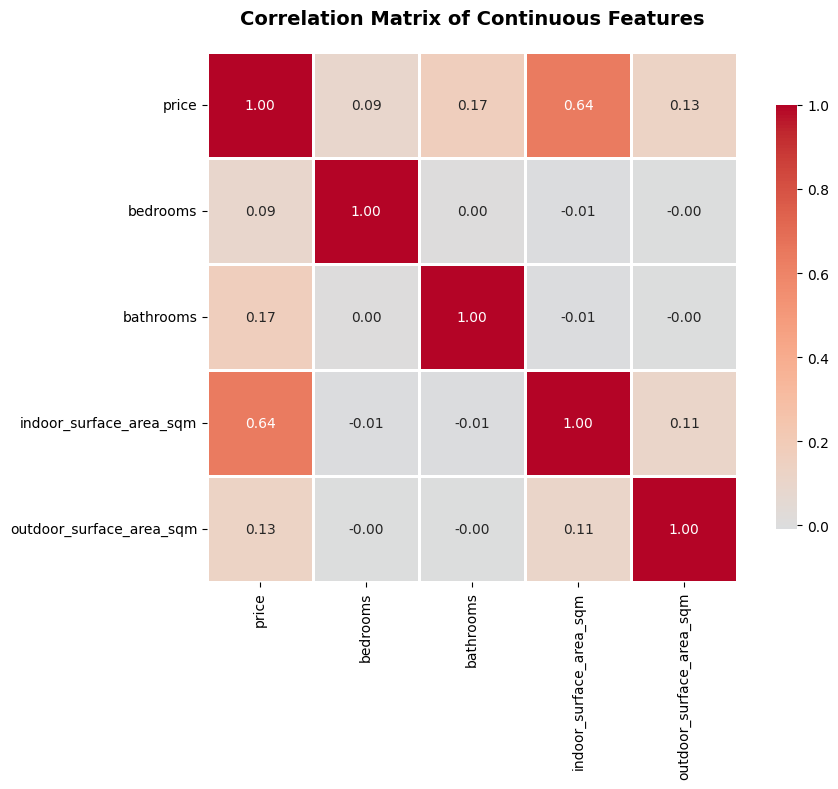

In [30]:
# Correlation heatmap for continuous features
if len(continuesFeatures) > 1:
    corr_matrix = df[continuesFeatures].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
    plt.title('Correlation Matrix of Continuous Features', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

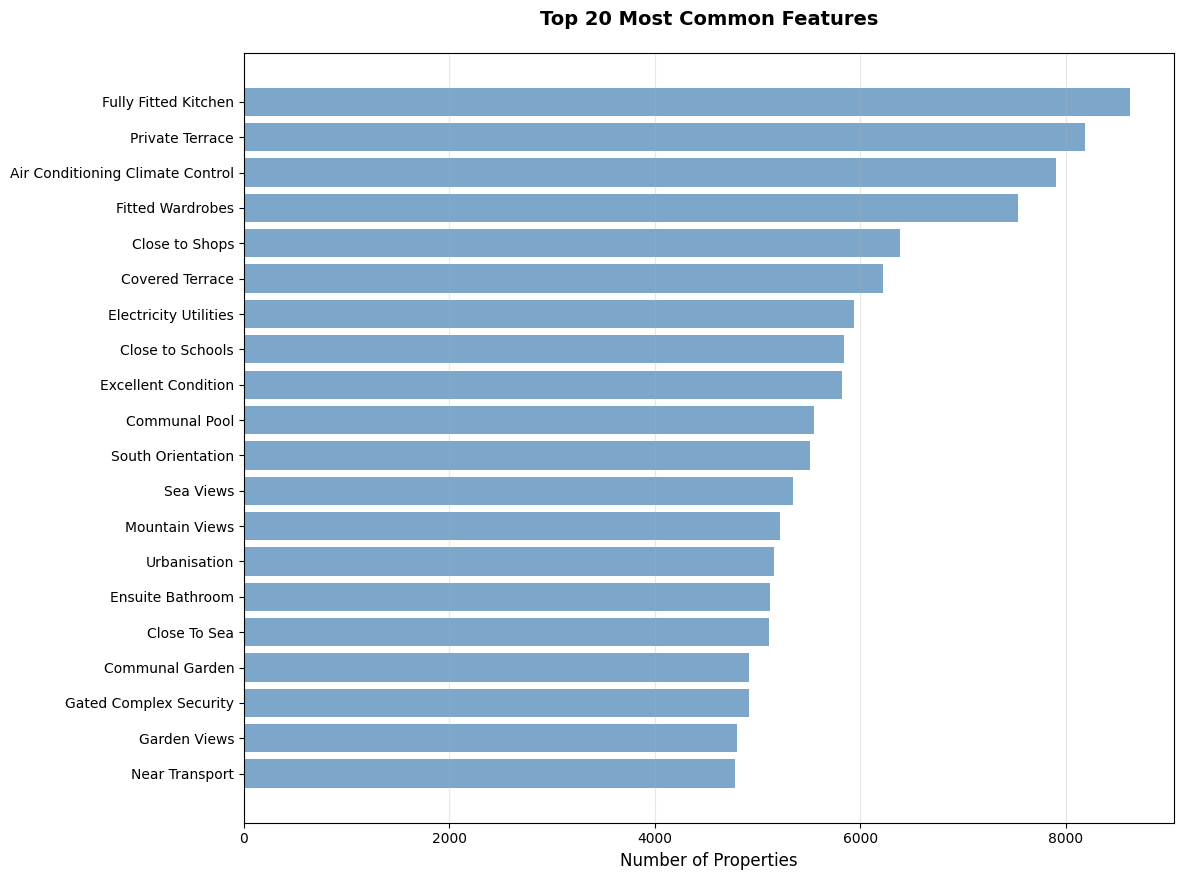

In [31]:
feature_cols = categoricalFeatures.copy()

feature_counts = {}
for col in feature_cols:
    if col in df.columns:
        y_count = (df[col] == 'Y').sum()
        feature_counts[col] = y_count

top_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)[:20]
feature_names = [f[0] for f in top_features]
feature_values = [f[1] for f in top_features]

plt.figure(figsize=(12, 10))
plt.barh(range(len(feature_names)), feature_values, color='steelblue', alpha=0.7)
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Number of Properties', fontsize=12)
plt.title('Top 20 Most Common Features', fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis() 
plt.grid(axis='x', alpha=0.3)



In [32]:
for feature in df.columns:
    if df[feature].dtype != "object":
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean = df[feature].mean()
        df.loc[(df[feature] < lower_bound) | (df[feature] > upper_bound), feature] = int (mean)

In [33]:
from sklearn.preprocessing import LabelEncoder
import pickle

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
continues_features = df.select_dtypes(exclude=['object']).columns.tolist()

encoders = {}
for feature in categorical_features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        encoders[feature] = le
    
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)



In [34]:
from sklearn.preprocessing import StandardScaler

scalers = {}
for feature in continues_features:
    scaler = StandardScaler()
    df[feature] = scaler.fit_transform(df[[feature]]).ravel()
    scalers[feature] = scaler

with open('scalers.pkl', 'wb') as f:
    pickle.dump(scalers, f)


In [35]:
with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)


In [36]:
# corr po outlier
# if len(continuesFeatures) > 1:
#     corr_matrix = df[continuesFeatures].corr()
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
#                 square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
#     plt.title('Correlation Matrix of Continuous Features', fontsize=14, fontweight='bold', pad=20)
#     plt.tight_layout()
#     plt.show()

In [37]:
# n_features = len(continuesFeatures)
# n_cols = 3
# n_rows = int(np.ceil(n_features / n_cols))

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
# axes = axes.flatten() if n_features > 1 else [axes]

# for i, feature in enumerate(continuesFeatures):
#     data = df[feature].dropna()
#     axes[i].hist(data, bins=50, edgecolor='black', alpha=0.7)
#     axes[i].set_title(f'Histogram of {feature}', fontsize=12, fontweight='bold')
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Frequency')
#     axes[i].grid(True, alpha=0.3)
    
#     mean_val = data.mean()
#     median_val = data.median()
#     axes[i].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
#     axes[i].axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
#     axes[i].legend()

# for i in range(n_features, len(axes)):
#     axes[i].set_visible(False)


In [38]:
# fig, axes = plt.subplots(1, n_features, figsize=(5*n_features, 6))
# if n_features == 1:
#     axes = [axes]

# for i, feature in enumerate(continuesFeatures):
#     data = df[feature].dropna()
#     axes[i].boxplot(data, vert=True)
#     axes[i].set_title(f'Box Plot of {feature}', fontsize=12, fontweight='bold')
#     axes[i].set_ylabel(feature)
#     axes[i].grid(True, alpha=0.3)

Before images:
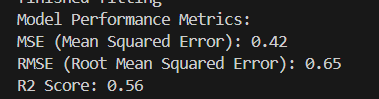